In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

We begin by reading the data in and making some visual observations about the same

In [9]:
# Reading in the data in from the CSV in the data folder using pandas
breast_cancer_data = pd.read_csv("./data/breast_cancer_data.csv")
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There seems to be an unamed column at the extreme right of the table. This column should be dropped when working with the decision tree. Let's drop the last column. for the purposes of our EDA as well

In [14]:
# Drop the last column from the database.
breast_cancer_data = breast_cancer_data.drop(labels = 'Unnamed: 32', axis = 1)

In [242]:
len(breast_cancer_data)

569

In [244]:
col_names = breast_cancer_data.columns.tolist()
len(col_names)-2 # -2 is because diagnosis is the target and id is not relevant

30

### Sample Size (n) = 569  
### Number of Features = 30

That's a good sample size for the number of features. Seems like a reasonable data set barring any sampling or experimental biases which we can't really explore. 

Let's also try to make sure that none of the columns have any null values

In [245]:
col_names

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [249]:
summary_of_nulls = pd.DataFrame(columns=['column_name', 'number_of_nulls'])
number_of_nulls = []

In [250]:
for cols in col_names:
    number_of_nulls.append(breast_cancer_data[cols].isnull().sum())

In [251]:
summary_of_nulls['number_of_nulls'] = number_of_nulls
summary_of_nulls['column_name'] = col_names
summary_of_nulls

,column_name,number_of_nulls
0,id,0
1,diagnosis,0
2,radius_mean,0
3,texture_mean,0
4,perimeter_mean,0
5,area_mean,0
6,smoothness_mean,0
7,compactness_mean,0
8,concavity_mean,0
9,concave points_mean,0


It seems there are no null values in any of the columns. That's good news!

***

Let's look at the distributions of each of the 30 features. This will help us spot any outliers or peculiar trends in the distribution of each feature while also helping us understand the range of values to expect for each feature.  

By segregating the data by diagnosis (Malignant or Benign), we might also get a good idea of which of the features would serve as stronger predicters for malignancy.

In [87]:
malignant_breast_cancer_data = breast_cancer_data.query('diagnosis == "M"')
benign_breast_cancer_data = breast_cancer_data.query('diagnosis == "B"')

malignant_breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [166]:
benign_breast_cancer_data.head() concave points_mean...

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


Now let's drop the id and diagnosis column because we aren't interested in the distributions of those columns.

In [253]:
feature_col_names = breast_cancer_data.columns.tolist()[2:]
len(feature_col_names)

30

In [254]:
feature_col_names_queue = feature_col_names.copy()

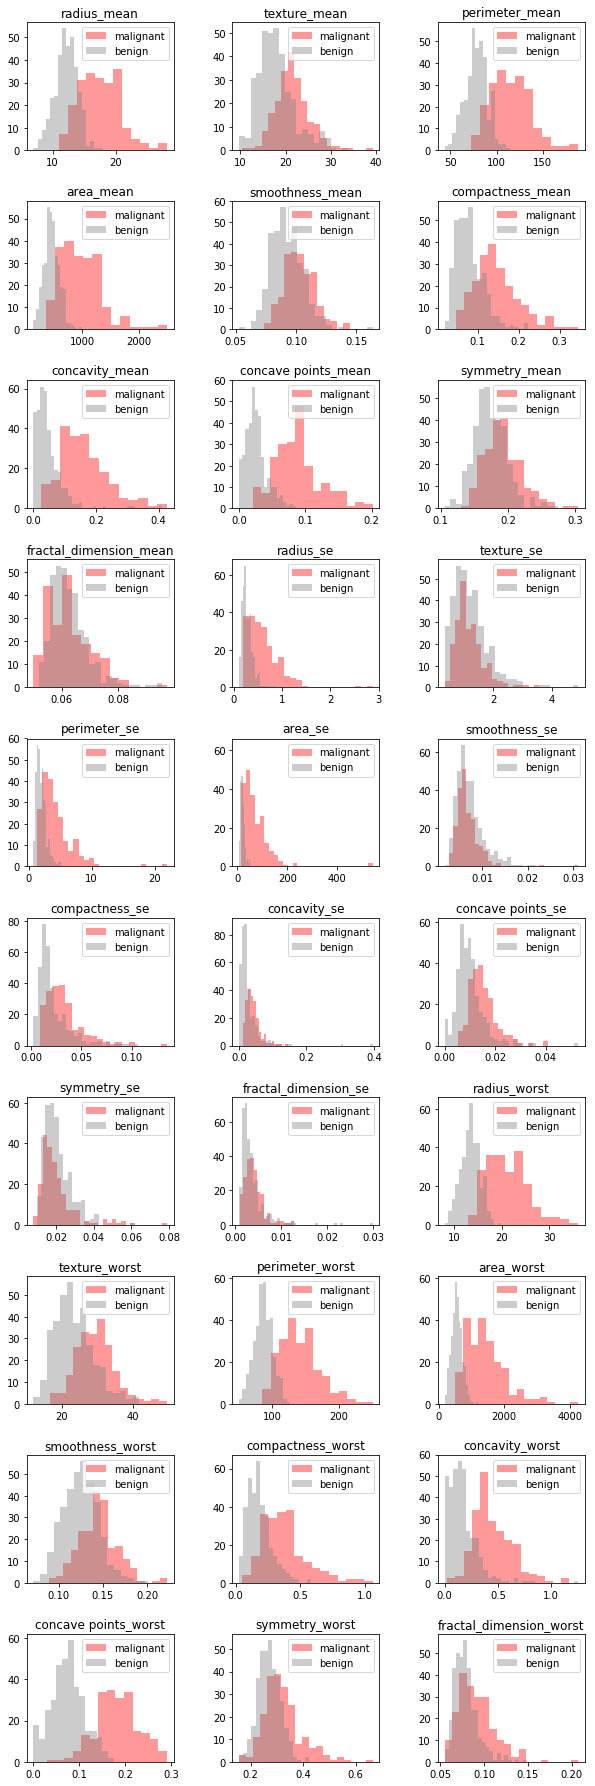

In [255]:
plt.rcParams['figure.figsize']= 10,32
fig, ax = plt.subplots(10, 3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for row_num in range(ax.shape[0]):
    for col_num in range(ax.shape[1]):
        feature = feature_col_names_queue.pop(0)
        sns.distplot(malignant_breast_cancer_data[[feature]],
                     kde = False, ax = ax[row_num, col_num], color = 'red', label = 'malignant').set_title(feature)
        sns.distplot(benign_breast_cancer_data[[feature]],
                     kde = False, ax = ax[row_num, col_num], color = 'grey', label = 'benign')
        ax[row_num, col_num].legend()

It seems like there are a significant number of features that would serve as strong predictors based on the centers of there distributions.  Some of the features also have a signifianct skew in the distributions. Exploring whether some of these fatures have outliers at the end of their tails is something that could be revisited when trying to improve the accuracy of our Decision Tree model. If on exploring the outliers we do find out that they are mistakesoe data entry errors, we could remove them to improve our model's accuracy

Some expected strong predictors could be:
* radius_mean  
* perimeter_mean
* concave_points_mean  
* area_worst  
* area_se  
* concavity_worst  
* concave_points_worst  


Below are the statistical summaries of each column to that can be referenced to explain or understand, in a quantifiable manner, the distribution of the features above.

In [341]:
malignant_feature_summary = malignant_breast_cancer_data_features.describe()
malignant_feature_summary

#Access a single column by using the column name
# malignant_feature_summary[['radius_mean']]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [342]:
benign_feature_summary = benign_breast_cancer_data_features.describe()
benign_feature_summary

#Access a single column by using the column name
# benign_feature_summary[['radius_mean']]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [332]:
features_to_explore_further = ['radius_mean', 'perimeter_mean',
                               'area_se', 'concavity_worst', 'area_se', 'area_worst']

Let's plot some of them in a boxplot to further consolidate our expectation of these features

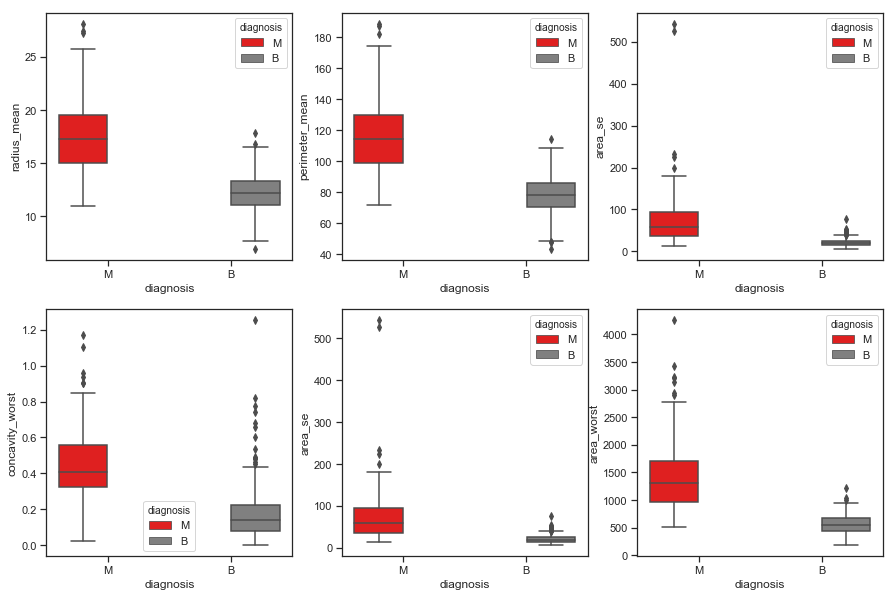

In [333]:
plt.rcParams['figure.figsize']= 15,10
fig2, ax2 = plt.subplots(2, 3)
sns.set(style="ticks", palette="pastel")
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for row_num in range(ax2.shape[0]):
    for col_num in range(ax2.shape[1]):
        feature = features_to_explore_further.pop(0)
        sns.boxplot(x = "diagnosis", y = feature,
            hue="diagnosis", palette=["red", "grey"], ax = ax2[row_num, col_num], 
            data=breast_cancer_data)

These plots do reinforce my belief that these features should be good predictors. Not only is the spread of values for the malignant diagnosis larger, but in most cases 80% of the benign values for a feature lie below the 25 percentile mark of the resepective malignant feature. This to me suggests that malignant tumors seem to have larger values for the features in display above.   

The plots also suggest that there are outliers and some cases they are quite far. However, for now we do not have any information that would help us reject these outliers and hence we must assume that these values are possible. 